In [1]:
import pandas as pd
import numpy as np
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

# Vectorizer convert text to vector 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import MultinomialNB # Naive Bayes (Multinomial)
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest


In [33]:
# import dataset
df = pd.read_csv("dataset.csv")
df.head()

,Emotion,Text
0,neutral,@dannycastillo Houston ticket neitu nen kan in...
1,neutral,cant fall muhil thei lo
2,neutral,Balisage Markup Conference 2009 Program-a No T...
3,neutral,@cynthia_123 i muhil thei lo
4,neutral,Bus bl***y chu ka miss ta!!!!!!!!


In [34]:
#shuffle the dataset
df = df.sample(frac = 1)

In [35]:
# text processing function 
def clean_text(text):
    # to lower case
    text = text.lower()
    # remove links
    text = re.sub('https:\/\/\S+', '', text) 
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    # remove next line     
    text = re.sub(r'[^ \w\.]', '', text) 
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    return text
# Create a new column called "Text" for collecting clean text
df['Text'] = df.Text.apply(lambda x: clean_text(x))

In [36]:
# Stop word in  mizo language
stop_words  = "a, i si a min em  le tak te e in he u tih ka va keimah keini kan keimahni nangmah nangma nangmahni ngei pawh ani amah a ta chu ni chumi anni an engnge khawi tunge hei sawmi hengte hi tawh nei ti mek leh mahse chuan emaw avang angin hma laiin tan hmunah tu nen lam kalh karah chhungah tlang hmaah hnuah chungah hnuai ah atangin chunglam hnuailam chhung pawn titawp hla zawk tichuan vawikhat hetah sawtah engtikah khawnge engati nge engtin zavai engpawh pahnihin vek tlem belh ber thildang engemawzat chutiang aih ve chauh inang chuvangin aiin lutuk thei duhdan chiah don tur tunah"

# Convert to lower case
stop_words = stop_words.lower()

# convert string to list
def Convert(string):
    li = list(string.split(" "))
    return li


stop_word_list = Convert(stop_words)

# Remove stop words
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word_list)]))

In [37]:
import numpy as np
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the trained Word2Vec model
model = gensim.models.Word2Vec.load("Word2VecModel.model")

# Get the vocabulary and corresponding word vectors
word_vectors = model.wv.vectors

# Tokenize the text data
tokenizer = nltk.tokenize.word_tokenize
sentences = df["Text"].tolist()
tokenized_sentences = [tokenizer(sentence.lower()) for sentence in sentences]

y = df["Emotion"]
# Get the average vector for all words in each sentence that are present in the vocabulary
feature_vectors = []
for sentence in tokenized_sentences:
    vector_sum = 0
    count = 0
    for word in sentence:
        if word in model.wv.key_to_index:
            vector_sum += word_vectors[model.wv.key_to_index[word]]
            count += 1
    if count != 0:
        feature_vectors.append(vector_sum / count)
    else:
        feature_vectors.append([0] * model.vector_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, y, test_size=0.2)

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(),
          "RF": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Call the fit_and_score function to obtain model scores
model_compare_Word2vec = fit_and_score(models=models,
                                X_train=X_train,
                                X_test=X_test,
                                y_train=y_train,
                                y_test=y_test)
print(model_compare_Word2vec) # print the model scores


C:\Users\Raunak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.35932914046121595, 'Decision Tree': 0.28259958071278823, 'SVM': 0.35429769392033544, 'RF': 0.39664570230607965}


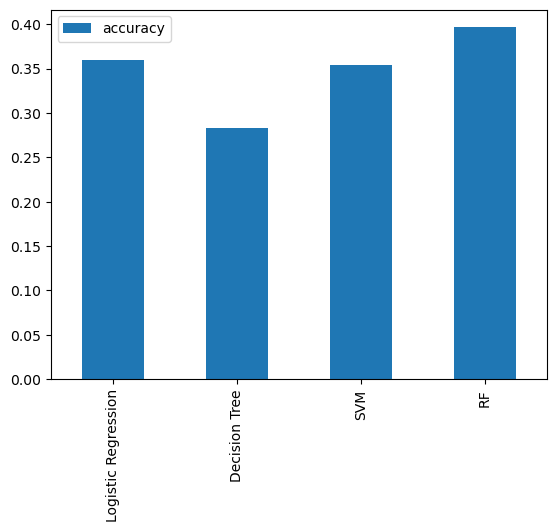

In [38]:
model_compare_Word2vec = pd.DataFrame(model_compare_Word2vec, index=['accuracy'])
model_compare_Word2vec.T.plot.bar();

In [39]:
# Independent variables (no target column)
Xfeatures = df["Text"]
# Targets
ylabels = df["Emotion"]

In [17]:
type(Xfeatures)

pandas.core.series.Series

In [40]:
# Step 2: Tokenization using TensorFlow Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Xfeatures)
tokenized_text_data = tokenizer.texts_to_sequences(Xfeatures)

In [42]:
# Transform text to bag of words model 
cv = CountVectorizer(tokenizer=lambda x: tokenizer.sequences_to_texts([x])[0], lowercase=False)
X_cv = cv.fit_transform(tokenized_text_data)

In [47]:
tf = TfidfVectorizer(tokenizer=lambda x: tokenizer.sequences_to_texts([x])[0], lowercase=False)
X_tf = tf.fit_transform(tokenized_text_data)

In [48]:
# Split into train & test set
X_train_cv, X_text_cv, y_train_cv, y_test_cv = train_test_split(X_cv, ylabels, test_size=0.2, random_state = 42)
X_train_tf, X_text_tf, y_train_tf, y_test_tf = train_test_split(X_tf, ylabels, test_size=0.2, random_state = 42)

In [44]:
# Put models in a dictionary
models = {"MNB": MultinomialNB(),
          "Logistic Regression": LogisticRegression(), 
          "Decesion Tree": DecisionTreeClassifier(),
            "SVM": SVC(),
             "RF": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [45]:
model_scores_cv = fit_and_score(models=models,
                             X_train=X_train_cv,
                             X_test=X_text_cv,
                             y_train=y_train_cv,
                             y_test=y_test_cv)
model_scores_cv

C:\Users\Raunak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'MNB': 0.36058700209643607,
 'Logistic Regression': 0.3937106918238994,
 'Decesion Tree': 0.32243186582809225,
 'SVM': 0.4092243186582809,
 'RF': 0.4360587002096436}

In [49]:
model_scores_tf = fit_and_score(models=models,
                             X_train=X_train_tf,
                             X_test=X_text_tf,
                             y_train=y_train_tf,
                             y_test=y_test_tf)
model_scores_tf

C:\Users\Raunak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'MNB': 0.3584905660377358,
 'Logistic Regression': 0.4176100628930818,
 'Decesion Tree': 0.3316561844863732,
 'SVM': 0.44863731656184486,
 'RF': 0.4410901467505241}

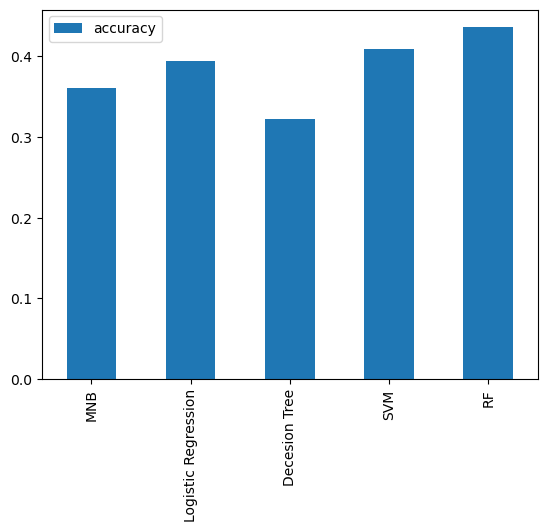

In [50]:
model_compare_cv = pd.DataFrame(model_scores_cv, index=['accuracy'])
model_compare_cv.T.plot.bar();

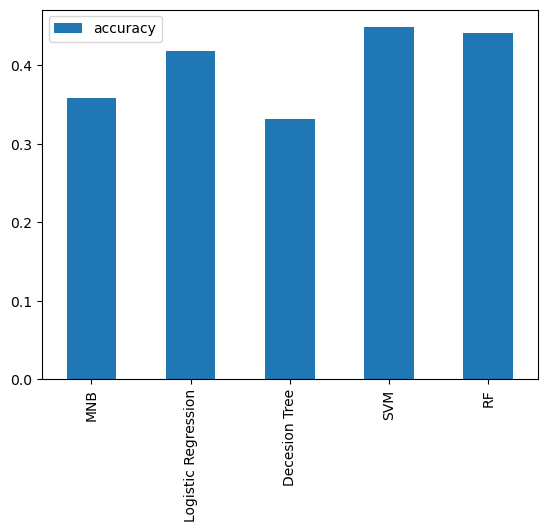

In [51]:
model_compare_tf = pd.DataFrame(model_scores_tf, index=['accuracy'])
model_compare_tf.T.plot.bar();